In [1]:
import tensorflow as tf
from tensorflow import keras as ks
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\P6049834\Desktop\Kotoku real estate final.xlsx')

In [3]:
df=df.iloc[0:720]
df

,0,1,address,Latitude,Longitude,Nearest Station,Distance from Station(min),Size,Type,Bedroom,Living,Dining,kitchen,Storage,balcony size (),year built,BUILDING AGE
0,ヴェラハイツ亀戸,2180.0,東京都江東区亀戸６-２４－１,35.695640,139.826298,ＪＲ総武線「亀戸」,4.0,31.50,1K,1.0,0.0,0.0,1.0,0.0,3.63,1978.0,45
1,亀戸パークハイツ,2480.0,東京都江東区亀戸１-１６－８,35.694074,139.823100,ＪＲ総武線「亀戸」,8.0,47.00,2LDK,2.0,1.0,1.0,1.0,0.0,6.77,1974.0,49
2,北砂４丁目住宅,2690.0,東京都江東区北砂４,35.678127,139.831055,東京メトロ東西線「南砂町」,15.0,54.00,2LDK,2.0,1.0,1.0,1.0,0.0,4.50,1972.0,51
3,東陽町公園ハイツ壱番館 ９階,2780.0,東京都江東区南砂２,35.673079,139.822740,東京メトロ東西線「東陽町」,13.0,40.00,1LDK,1.0,1.0,1.0,1.0,0.0,5.43,1984.0,39
4,北砂四丁目住宅,2798.0,東京都江東区北砂４,35.678127,139.831055,東京メトロ東西線「南砂町」,18.0,54.00,2LDK,2.0,1.0,1.0,1.0,0.0,4.50,1972.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ブリリア有明シティタワー 27階／南東向き／２LDK…,8490.0,東京都江東区有明１,35.640373,139.786936,新交通ゆりかもめ「有明テニスの森」,9.0,70.63,2LDK,2.0,1.0,1.0,1.0,0.0,15.00,2014.0,9
716,スカイズタワー＆ガーデン,8490.0,東京都江東区豊洲６,35.645604,139.785658,新交通ゆりかもめ「新豊洲」,5.0,65.35,2LDK,2.0,1.0,1.0,1.0,0.0,11.62,2014.0,9
717,スカイズタワー＆ガーデン,8490.0,東京都江東区豊洲６,35.645604,139.785658,新交通ゆりかもめ「新豊洲」,4.0,65.35,2LDK,2.0,1.0,1.0,1.0,0.0,11.62,2014.0,9
718,パークハウス清澄白河タワー,8580.0,東京都江東区白河４,35.682697,139.808032,東京メトロ半蔵門線「清澄白河」,6.0,73.03,2LDK,2.0,1.0,1.0,1.0,0.0,11.30,2010.0,13


In [4]:
df.columns

Index(['0', '1', 'address', 'Latitude', 'Longitude', 'Nearest Station',
       'Distance from Station(min)', 'Size', 'Type', 'Bedroom', 'Living',
       'Dining', 'kitchen', 'Storage', 'balcony size ()', 'year built',
       'BUILDING AGE'],
      dtype='object')

In [5]:
df=df[['1', 'Latitude', 'Longitude','Distance from Station(min)', 'Size', 'Bedroom', 'Living',
       'Dining', 'Storage', 'balcony size ()',
       'BUILDING AGE']].copy()

In [6]:
df

,1,Latitude,Longitude,Distance from Station(min),Size,Bedroom,Living,Dining,Storage,balcony size (),BUILDING AGE
0,2180.0,35.695640,139.826298,4.0,31.50,1.0,0.0,0.0,0.0,3.63,45
1,2480.0,35.694074,139.823100,8.0,47.00,2.0,1.0,1.0,0.0,6.77,49
2,2690.0,35.678127,139.831055,15.0,54.00,2.0,1.0,1.0,0.0,4.50,51
3,2780.0,35.673079,139.822740,13.0,40.00,1.0,1.0,1.0,0.0,5.43,39
4,2798.0,35.678127,139.831055,18.0,54.00,2.0,1.0,1.0,0.0,4.50,51
...,...,...,...,...,...,...,...,...,...,...,...
715,8490.0,35.640373,139.786936,9.0,70.63,2.0,1.0,1.0,0.0,15.00,9
716,8490.0,35.645604,139.785658,5.0,65.35,2.0,1.0,1.0,0.0,11.62,9
717,8490.0,35.645604,139.785658,4.0,65.35,2.0,1.0,1.0,0.0,11.62,9
718,8580.0,35.682697,139.808032,6.0,73.03,2.0,1.0,1.0,0.0,11.30,13


In [7]:
df.dtypes

1                             float64
Latitude                      float64
Longitude                     float64
Distance from Station(min)    float64
Size                          float64
Bedroom                       float64
Living                        float64
Dining                        float64
Storage                       float64
balcony size ()               float64
BUILDING AGE                    int64
dtype: object

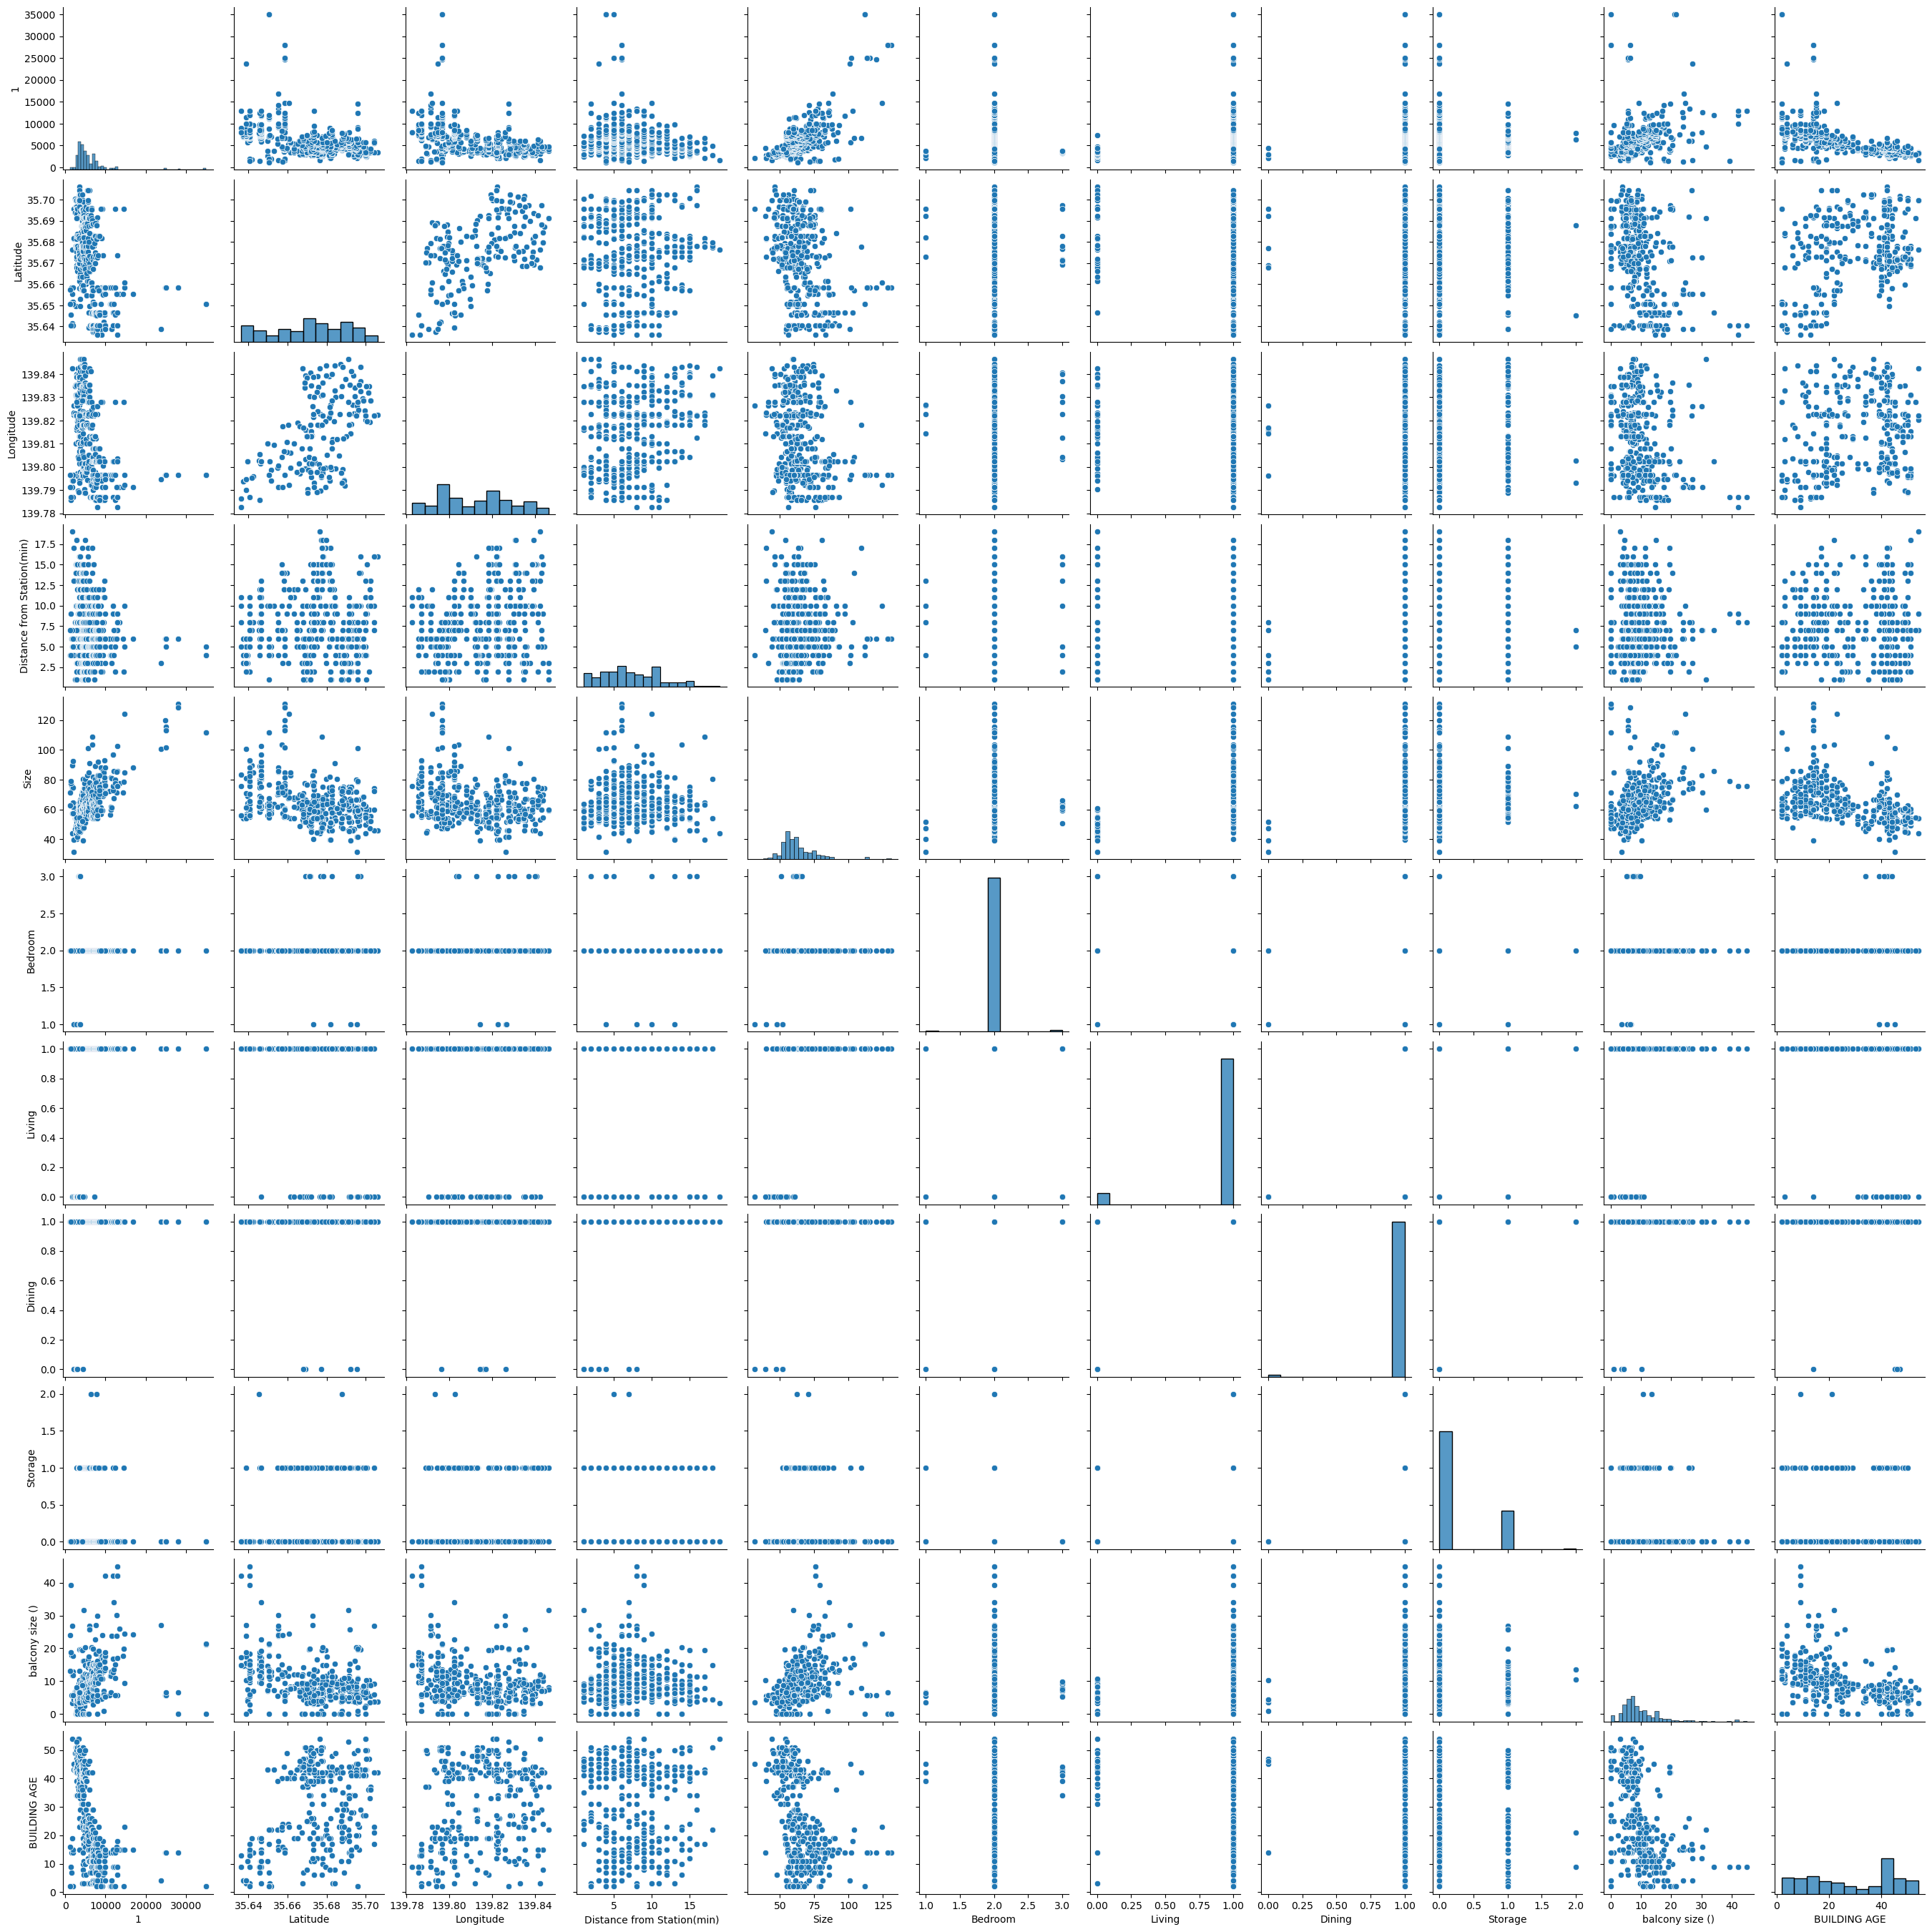

In [8]:
sns.pairplot(df,
             vars=['1', 'Latitude', 'Longitude', 'Distance from Station(min)', 'Size', 'Bedroom', 'Living',
       'Dining', 'Storage', 'balcony size ()',
       'BUILDING AGE'],
            )
plt.show()

In [9]:
df_corr = df[['1', 'Latitude', 'Longitude', 'Distance from Station(min)', 'Size', 'Bedroom', 'Living',
       'Dining','Storage', 'balcony size ()',
       'BUILDING AGE']].dropna().corr()
df_corr

,1,Latitude,Longitude,Distance from Station(min),Size,Bedroom,Living,Dining,Storage,balcony size (),BUILDING AGE
1,1.000000,-0.384578,-0.383827,-0.150447,0.741599,-0.024168,0.174732,0.080534,-0.097516,0.340794,-0.529137
Latitude,-0.384578,1.000000,0.718682,0.010091,-0.323664,0.007500,-0.140025,-0.017060,0.206121,-0.405476,0.524790
Longitude,-0.383827,0.718682,1.000000,0.202710,-0.222860,0.041290,-0.073511,-0.021150,0.261435,-0.304429,0.398680
Distance from Station(min),-0.150447,0.010091,0.202710,1.000000,-0.028819,0.027820,-0.057594,0.131868,0.039970,-0.031412,0.110090
Size,0.741599,-0.323664,-0.222860,-0.028819,1.000000,0.045364,0.293461,0.131039,0.115252,0.361401,-0.402693
Bedroom,-0.024168,0.007500,0.041290,0.027820,0.045364,1.000000,-0.065529,0.094581,-0.053070,-0.000426,0.034171
Living,0.174732,-0.140025,-0.073511,-0.057594,0.293461,-0.065529,1.000000,0.425361,0.098398,0.195199,-0.228617
Dining,0.080534,-0.017060,-0.021150,0.131868,0.131039,0.094581,0.425361,1.000000,0.067779,0.090970,-0.109229
Storage,-0.097516,0.206121,0.261435,0.039970,0.115252,-0.053070,0.098398,0.067779,1.000000,-0.066509,0.141253
balcony size (),0.340794,-0.405476,-0.304429,-0.031412,0.361401,-0.000426,0.195199,0.090970,-0.066509,1.000000,-0.503167


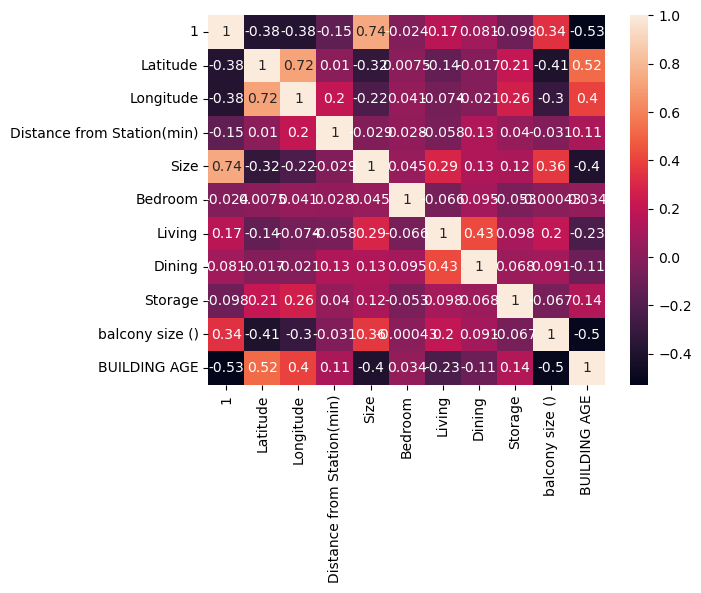

In [10]:
sns.heatmap(df_corr, annot=True)
plt.show()

In [118]:
X=df[['Latitude', 'Longitude', 'Size','balcony size ()','BUILDING AGE']]
y=df['1']

In [119]:
X.shape, y.shape

((720, 5), (720,))

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 5) (144, 5) (576,) (144,)


In [121]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [149]:
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, Y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1000)              6000      
                                                                 
 dropout_8 (Dropout)         (None, 1000)              0         
                                                                 
 dense_30 (Dense)            (None, 500)               500500    
                                                                 
 dropout_9 (Dropout)         (None, 500)               0         
                                                                 
 dense_31 (Dense)            (None, 250)               125250    
                                                                 
 dropout_10 (Dropout)        (None, 250)               0         
                                                                 
 dense_32 (Dense)            (None, 1)                

Epoch 46/5000
12/12 [==============================] - 0s 11ms/step - loss: 5735989.5000 - mae: 1212.6338 - val_loss: 10957472.0000 - val_mae: 1394.7085
Epoch 47/5000
12/12 [==============================] - 0s 11ms/step - loss: 6597246.0000 - mae: 1198.3107 - val_loss: 10105427.0000 - val_mae: 1406.1638
Epoch 48/5000
12/12 [==============================] - 0s 11ms/step - loss: 6511389.5000 - mae: 1276.7430 - val_loss: 10576148.0000 - val_mae: 1379.3737
Epoch 49/5000
12/12 [==============================] - 0s 11ms/step - loss: 5827590.0000 - mae: 1152.4484 - val_loss: 10295177.0000 - val_mae: 1383.6676
Epoch 50/5000
12/12 [==============================] - 0s 11ms/step - loss: 6195154.0000 - mae: 1209.4286 - val_loss: 9273369.0000 - val_mae: 1391.9738
Epoch 51/5000
12/12 [==============================] - 0s 11ms/step - loss: 5238730.5000 - mae: 1138.6594 - val_loss: 9873806.0000 - val_mae: 1389.9733
Epoch 52/5000
12/12 [==============================] - 0s 11ms/step - loss: 5959182.

Epoch 100/5000
12/12 [==============================] - 0s 11ms/step - loss: 3455322.2500 - mae: 1097.7404 - val_loss: 3116576.2500 - val_mae: 987.6833
Epoch 101/5000
12/12 [==============================] - 0s 12ms/step - loss: 3593721.5000 - mae: 1083.9944 - val_loss: 3184735.0000 - val_mae: 1011.2170
Epoch 102/5000
12/12 [==============================] - 0s 12ms/step - loss: 3950370.7500 - mae: 1168.3251 - val_loss: 3102671.2500 - val_mae: 1001.1875
Epoch 103/5000
12/12 [==============================] - 0s 11ms/step - loss: 3702037.7500 - mae: 1095.1022 - val_loss: 2885749.7500 - val_mae: 974.8060
Epoch 104/5000
12/12 [==============================] - 0s 11ms/step - loss: 3475718.2500 - mae: 1071.1899 - val_loss: 3079333.7500 - val_mae: 991.3362
Epoch 105/5000
12/12 [==============================] - 0s 12ms/step - loss: 3464637.0000 - mae: 1074.9341 - val_loss: 3071182.0000 - val_mae: 991.0523
Epoch 106/5000
12/12 [==============================] - 0s 11ms/step - loss: 3526593.2

Epoch 154/5000
12/12 [==============================] - 0s 13ms/step - loss: 3016578.2500 - mae: 1003.3771 - val_loss: 2262819.0000 - val_mae: 896.6976
Epoch 155/5000
12/12 [==============================] - 0s 12ms/step - loss: 2996825.5000 - mae: 994.1663 - val_loss: 2164062.2500 - val_mae: 875.6334
Epoch 156/5000
12/12 [==============================] - 0s 11ms/step - loss: 2586341.7500 - mae: 951.4645 - val_loss: 2183253.7500 - val_mae: 878.4663
Epoch 157/5000
12/12 [==============================] - 0s 11ms/step - loss: 3383729.0000 - mae: 998.3875 - val_loss: 2171825.5000 - val_mae: 870.6605
Epoch 158/5000
12/12 [==============================] - 0s 11ms/step - loss: 2807115.0000 - mae: 959.1737 - val_loss: 2075459.3750 - val_mae: 862.1771
Epoch 159/5000
12/12 [==============================] - 0s 11ms/step - loss: 3030100.0000 - mae: 992.6970 - val_loss: 2634549.5000 - val_mae: 971.7081
Epoch 160/5000
12/12 [==============================] - 0s 11ms/step - loss: 3247558.0000 - m

12/12 [==============================] - 0s 10ms/step - loss: 2788594.5000 - mae: 958.0220 - val_loss: 1945366.8750 - val_mae: 798.5842
Epoch 209/5000
12/12 [==============================] - 0s 10ms/step - loss: 2935472.7500 - mae: 966.1216 - val_loss: 2211391.7500 - val_mae: 925.2053
Epoch 210/5000
12/12 [==============================] - 0s 10ms/step - loss: 2916001.5000 - mae: 968.9773 - val_loss: 2204735.7500 - val_mae: 905.1331
Epoch 211/5000
12/12 [==============================] - 0s 10ms/step - loss: 2909879.0000 - mae: 956.9079 - val_loss: 2099504.7500 - val_mae: 875.6031
Epoch 212/5000
12/12 [==============================] - 0s 10ms/step - loss: 2782372.7500 - mae: 957.0422 - val_loss: 2062086.2500 - val_mae: 849.1244
Epoch 213/5000
12/12 [==============================] - 0s 10ms/step - loss: 3059456.7500 - mae: 1017.4759 - val_loss: 2058441.7500 - val_mae: 842.5242
Epoch 214/5000
12/12 [==============================] - 0s 10ms/step - loss: 2619789.2500 - mae: 949.8171 - 

12/12 [==============================] - 0s 10ms/step - loss: 2826044.2500 - mae: 965.5840 - val_loss: 2118605.5000 - val_mae: 880.8987
Epoch 263/5000
12/12 [==============================] - 0s 10ms/step - loss: 2797746.7500 - mae: 966.0698 - val_loss: 2176260.2500 - val_mae: 896.0983
Epoch 264/5000
12/12 [==============================] - 0s 10ms/step - loss: 2709209.0000 - mae: 934.2526 - val_loss: 2086296.0000 - val_mae: 866.6608
Epoch 265/5000
12/12 [==============================] - 0s 11ms/step - loss: 2616476.5000 - mae: 951.2793 - val_loss: 1902195.3750 - val_mae: 789.4221
Epoch 266/5000
12/12 [==============================] - 0s 11ms/step - loss: 2870661.5000 - mae: 953.4147 - val_loss: 2280997.2500 - val_mae: 928.4426
Epoch 267/5000
12/12 [==============================] - 0s 11ms/step - loss: 2839244.5000 - mae: 970.2615 - val_loss: 2329720.5000 - val_mae: 903.6321
Epoch 268/5000
12/12 [==============================] - 0s 11ms/step - loss: 2759395.0000 - mae: 955.3713 - v

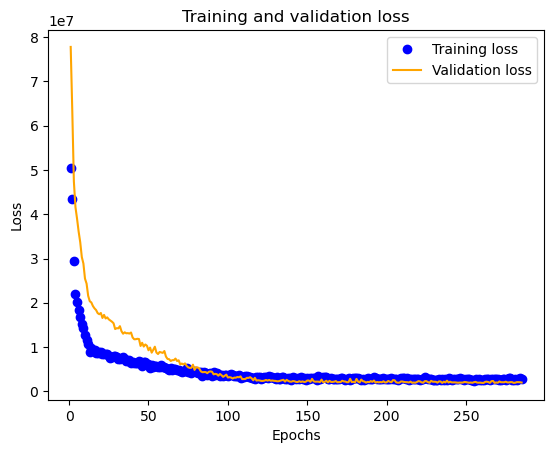

In [150]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


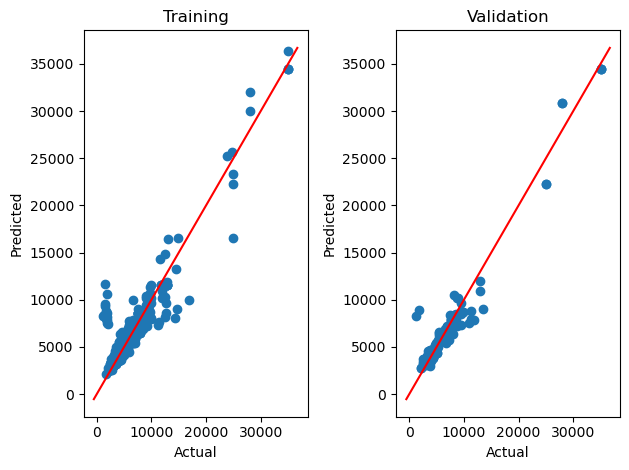

In [151]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=Y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [152]:
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

18/18 [==============================] - 0s 2ms/step
731.5922270880806
792.1960500081381


In [153]:
X_test

array([[0.66815216, 0.71918647, 0.26208703, 0.13866667, 0.76923077],
       [0.64833751, 0.62267641, 0.08400483, 0.096     , 0.78846154],
       [0.06089084, 0.06762445, 0.34629331, 0.36      , 0.13461538],
       [0.20609008, 0.21794403, 0.29865028, 0.286     , 0.        ],
       [0.32103478, 0.21794403, 0.2404311 , 0.12622222, 0.23076923],
       [0.13498667, 0.35638486, 0.57957293, 0.34      , 0.32692308],
       [0.31388755, 0.37831283, 0.23670427, 0.14444444, 0.80769231],
       [0.38965332, 0.42843347, 0.35958904, 0.17422222, 0.73076923],
       [0.84879445, 0.63771731, 0.29915391, 0.17066667, 0.78846154],
       [0.51736123, 0.48168958, 0.21857373, 0.13777778, 0.84615385],
       [0.73756848, 0.8194685 , 0.2260274 , 0.12488889, 0.40384615],
       [0.5309494 , 0.61012823, 0.26964142, 0.12222222, 0.90384615],
       [0.12980962, 0.31506708, 0.30962933, 0.302     , 0.13461538],
       [0.73756848, 0.8194685 , 0.29311039, 0.19822222, 0.44230769],
       [0.50183006, 0.39836108, 0.

In [154]:
pred

array([[ 3782.3054],
       [ 2811.5315],
       [ 8099.37  ],
       [ 7822.4824],
       [ 6035.397 ],
       [ 8425.586 ],
       [ 3806.0215],
       [ 4755.8203],
       [ 4378.0693],
       [ 3638.1272],
       [ 4322.596 ],
       [ 3584.0542],
       [ 6905.7925],
       [ 4719.904 ],
       [ 6256.8276],
       [ 7812.9673],
       [ 4501.093 ],
       [ 5478.8804],
       [ 6092.3496],
       [ 3674.9219],
       [ 4538.967 ],
       [ 7318.3667],
       [ 5701.788 ],
       [ 4451.179 ],
       [ 4513.457 ],
       [22310.6   ],
       [ 8244.376 ],
       [ 3900.2046],
       [ 3474.3428],
       [ 4066.374 ],
       [ 4590.8823],
       [ 6880.8223],
       [ 7511.9023],
       [ 3673.921 ],
       [ 7121.8213],
       [ 5682.6494],
       [ 4493.99  ],
       [ 4211.251 ],
       [22310.6   ],
       [ 3599.1914],
       [ 9618.458 ],
       [ 8693.239 ],
       [ 3777.2896],
       [ 3302.3345],
       [ 7072.8057],
       [ 6988.2725],
       [ 3684.9753],
       [ 5151

In [155]:
X_test.shape

(144, 5)

In [192]:


# Create a sample array
test = np.array([[35.6914537, 139.8227402,  64.84  ,  11    , 18],
                 [35.6914537, 139.8227402,  64.84  ,  11    , 15]])


In [193]:
test=min_max_scaler.fit_transform(test)

In [194]:
predictions = model.predict(test)

1/1 [==============================] - 0s 22ms/step


In [195]:
print(predictions)

[[2402.4756]
 [5057.9536]]
